<a href="https://colab.research.google.com/github/NeuralClassifier/OutlierDetect/blob/main/Local_Global_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import zipfile
import os
import shutil
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [2]:
!git clone https://github.com/NeuralClassifier/OutlierDetect

Cloning into 'OutlierDetect'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (348/348), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 348 (delta 86), reused 240 (delta 41), pack-reused 0
Receiving objects: 100% (348/348), 317.63 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Checking out files: 100% (212/212), done.


In [3]:
def unzipFile(file_name, exctraction_place):
  with zipfile.ZipFile(file_name,"r") as zip_ref:
      zip_ref.extractall(exctraction_place)
def removeFolder(file_path):
  try:
    shutil.rmtree(file_path)
  except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [26]:
unzipFile('50p.zip','/content/')

In [ ]:
df = pd.read_excel('/content/50p/3/50p_m3_dim2.xlsx')
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df

In [48]:
(max(X[:, 0])+1)*(-1)

-4.383144774863942

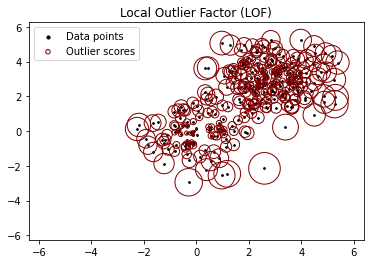

In [63]:
X = np.array(df.iloc[:,:-1])
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
#n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
plt.axis("tight")
plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
df_lofnorm

In [ ]:
df_lofnorm.sort_values(["normalized_LOF"], ascending=False)

In [4]:
#LOF

red = [30,50,70,90]
p70 = [1,2,3,4]
redPath = '/content/OutlierDetect/Data/reduced_synthetic_data/'

#path_reduced = "/content/"+str(self.reduction)+'p'
#os.mkdir(path_reduced)
#path = "/content/"+str(self.reduction)+'p'+"/outlierScore_perData/"
#os.mkdir(path)

for folders in red:
  subfold = redPath+str(folders)+'p/'
  p70 = [1,2,3,4]
  for subsub in p70:
    subfold = redPath+str(folders)+'p/'
    subfold = subfold+str(subsub)+'/'
    path = subfold+'/LOF/'
    os.mkdir(path)
    dim = [2, 10, 20, 40, 80, 100]
    for files in dim:
      filename = subfold+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'.xlsx'
      df = pd.read_excel(filename)
      df.drop(['Unnamed: 0'],axis=1,inplace=True)
      X = np.array(df.iloc[:,:-1])
      clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
      y_pred = clf.fit_predict(X)
      X_scores = clf.negative_outlier_factor_
      #plt.title("Local Outlier Factor (LOF)")
      #plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
      # plot circles with radius proportional to the outlier scores
      radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
      #plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
      #plt.axis("tight")
      #plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
      #plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
      #plt.xlabel("prediction errors: %d" % (n_errors))
      #legend = plt.legend(loc="upper left")
      #legend.legendHandles[0]._sizes = [10]
      #legend.legendHandles[1]._sizes = [20]
      #plt.show()
      df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
      df_lofnorm.to_excel(path+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'_LOF.xlsx')

In [9]:
def replace_lbls(lbl, indx):
  for idx in indx:
    lbl[idx] = 1
  return lbl

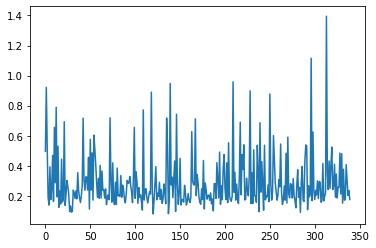

Enter threshold: 0.45


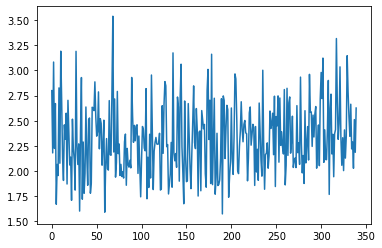

Enter threshold: 2.75


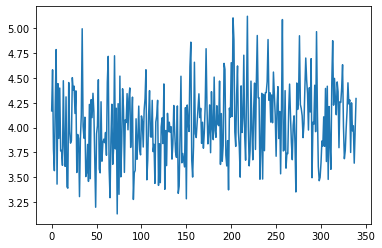

Enter threshold: 4.5


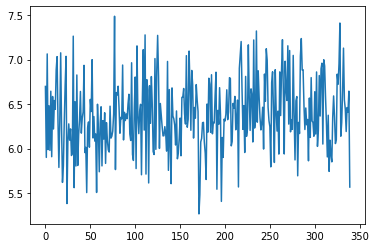

Enter threshold: 6.7


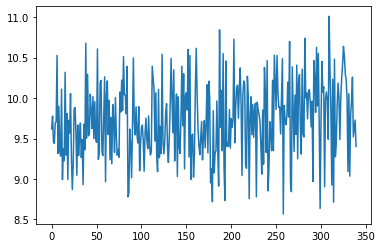

Enter threshold: 10.1


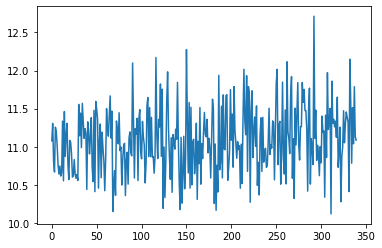

Enter threshold: 11.5


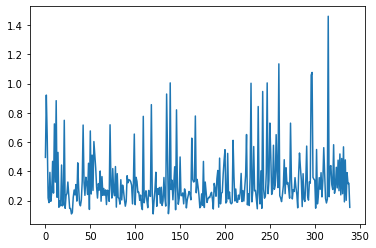

Enter threshold: 0.5


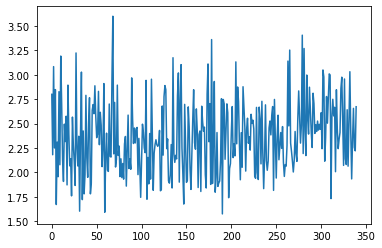

Enter threshold: 2.75


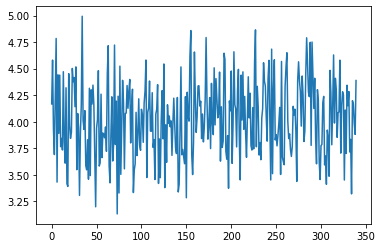

Enter threshold: 4.3


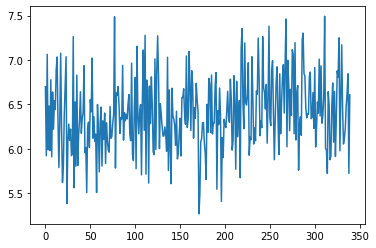

Enter threshold: 6.7


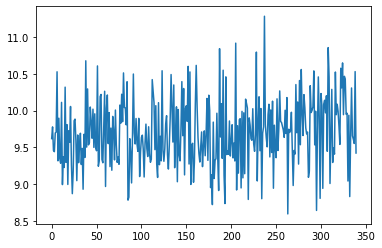

Enter threshold: 10.25


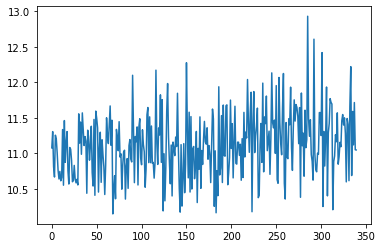

Enter threshold: 11.5


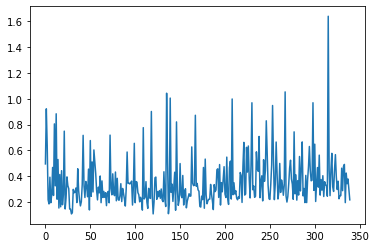

Enter threshold: 0.6


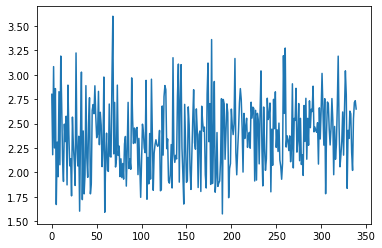

Enter threshold: 2.75


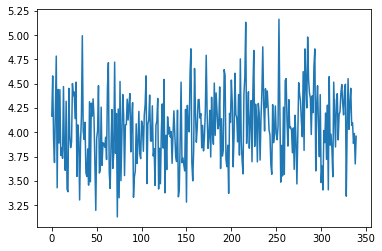

Enter threshold: 4.5


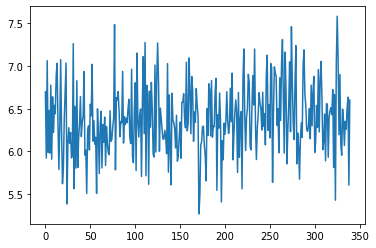

Enter threshold: 6.7


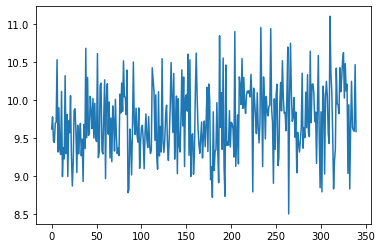

Enter threshold: 10


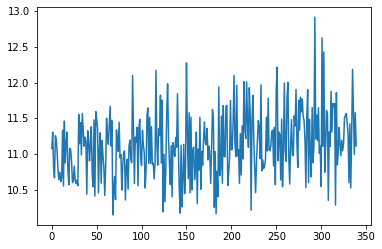

Enter threshold: 11.5


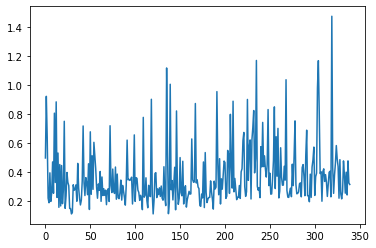

Enter threshold: 0.6


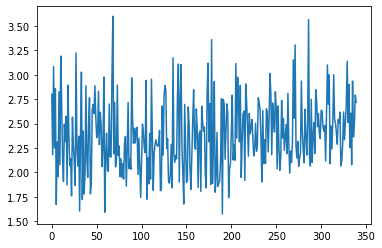

Enter threshold: 2.75


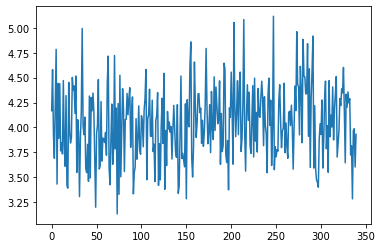

Enter threshold: 4.5


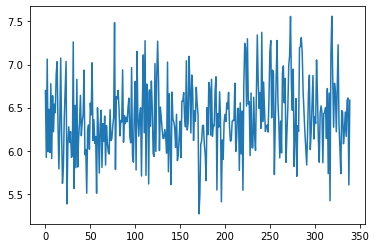

Enter threshold: 6.7


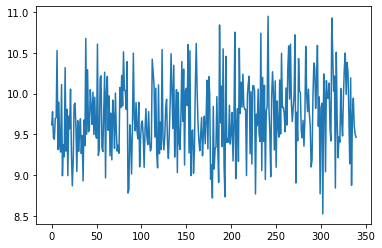

Enter threshold: 10.2


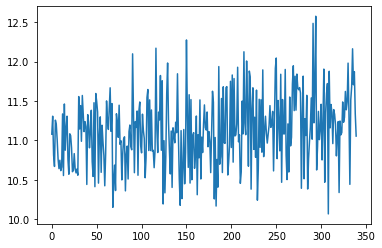

Enter threshold: 11.5


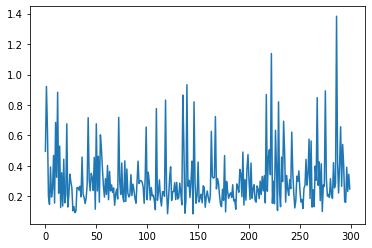

Enter threshold: 0.5


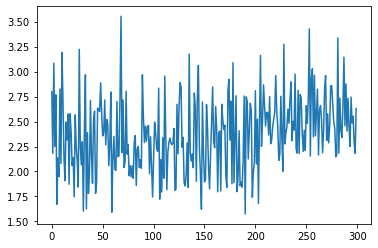

Enter threshold: 2.7


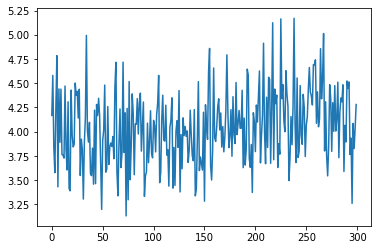

Enter threshold: 4.5


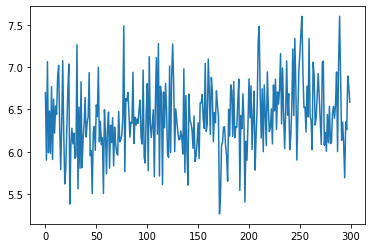

Enter threshold: 6.7


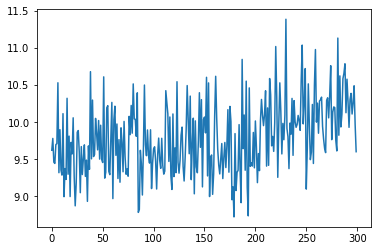

Enter threshold: 10.25


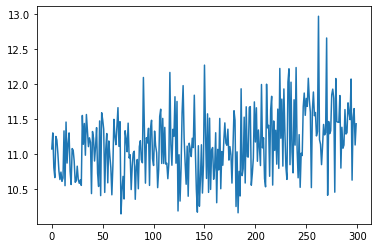

Enter threshold: 11.5


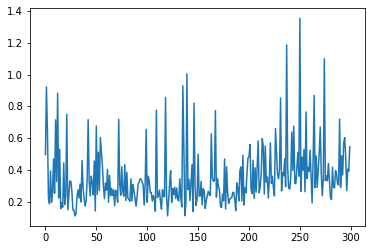

Enter threshold: 0.5


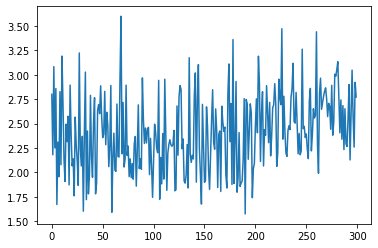

Enter threshold: 2.75


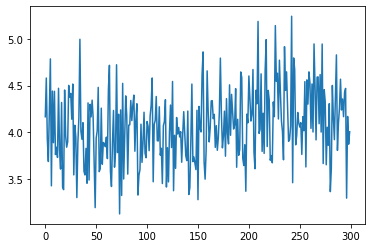

Enter threshold: 4.5


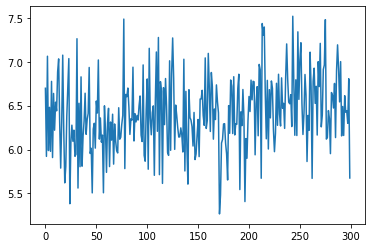

Enter threshold: 6.7


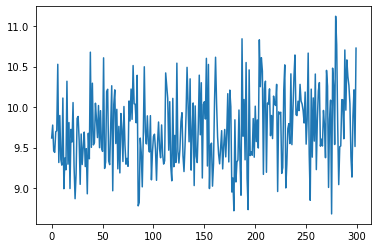

Enter threshold: 10.1


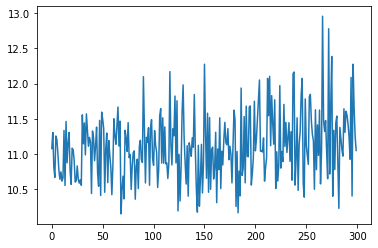

Enter threshold: 11.5


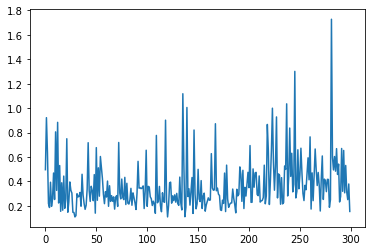

Enter threshold: 0.6


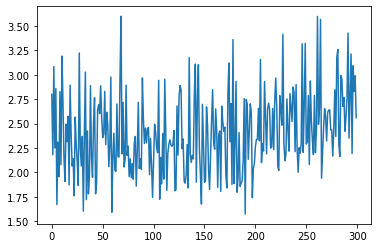

Enter threshold: 2.75


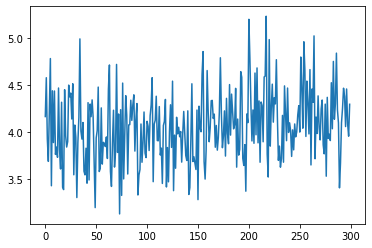

Enter threshold: 4.5


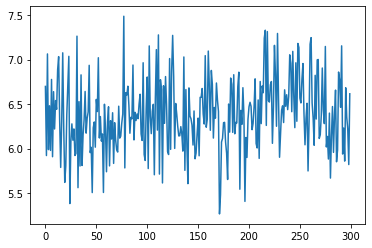

Enter threshold: 6.7


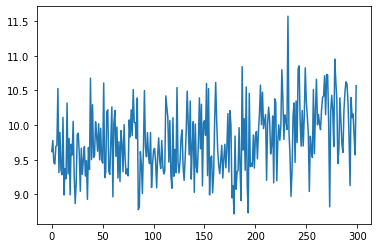

Enter threshold: 10.25


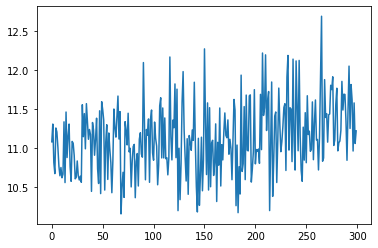

Enter threshold: 11.5


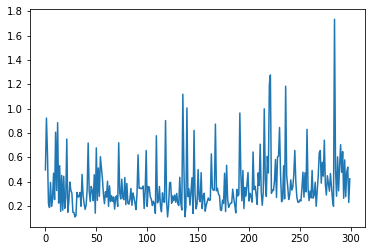

Enter threshold: 0.6


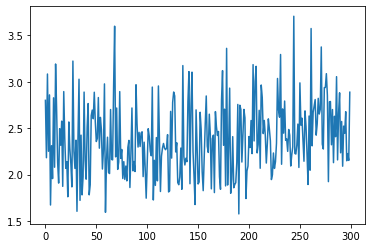

Enter threshold: 2.7


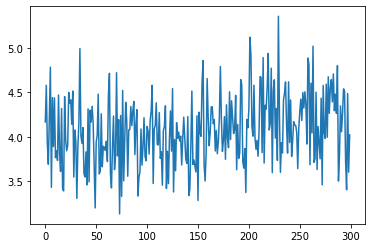

Enter threshold: 4.5


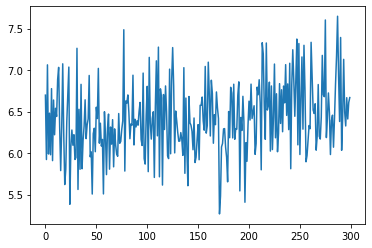

Enter threshold: 6.7


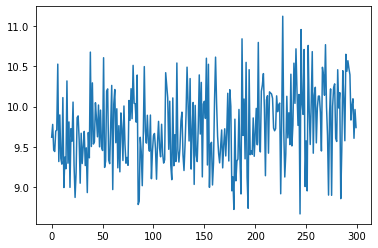

Enter threshold: 10.2


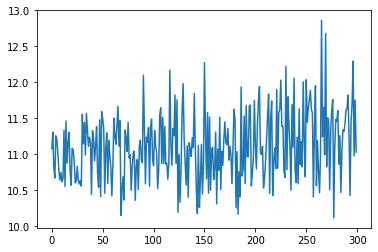

Enter threshold: 11.5


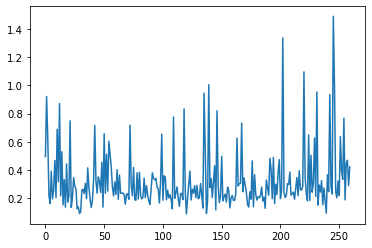

Enter threshold: 0.55


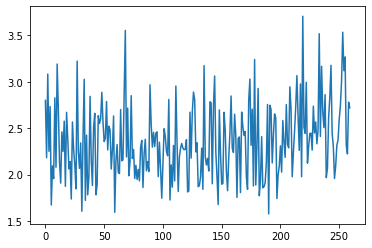

Enter threshold: 2.6


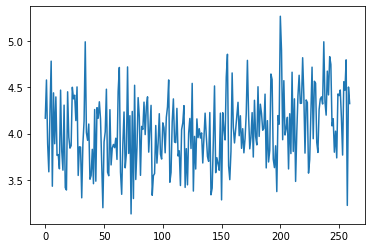

Enter threshold: 4.4


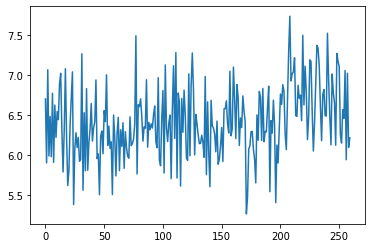

Enter threshold: 6.7


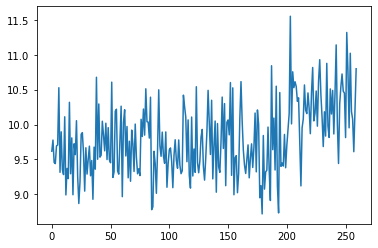

Enter threshold: 10.25


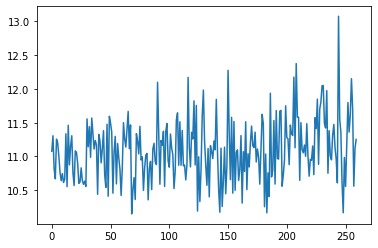

Enter threshold: 11.5


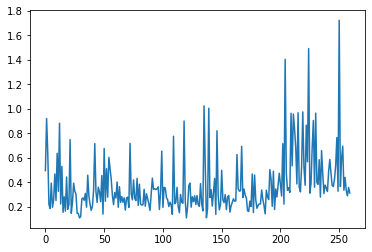

Enter threshold: 0.6


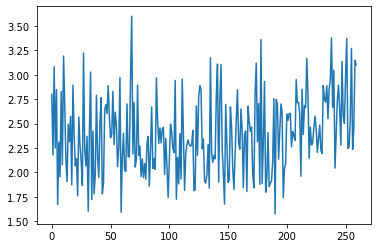

Enter threshold: 2.75


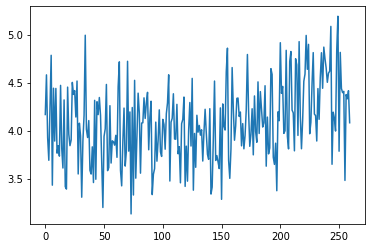

Enter threshold: 4.5


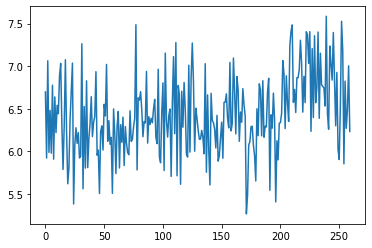

Enter threshold: 7


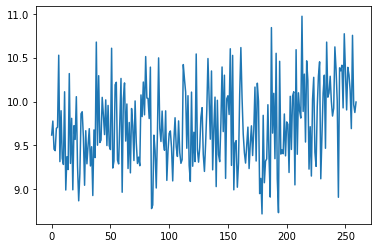

Enter threshold: 10.1


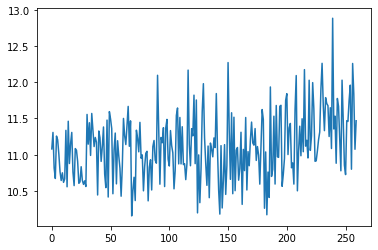

Enter threshold: 11.5


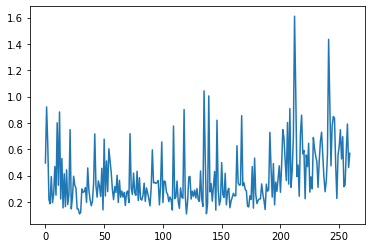

Enter threshold: 0.6


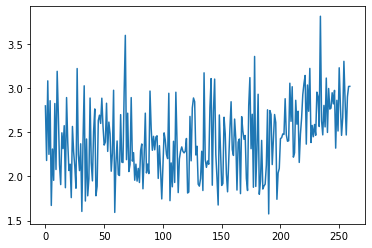

Enter threshold: 3


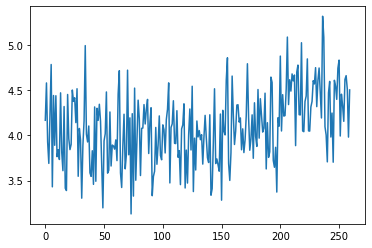

Enter threshold: 4.5


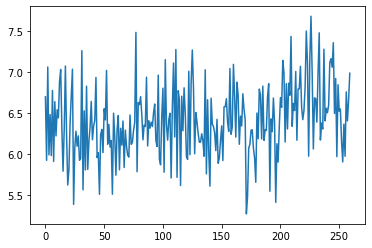

Enter threshold: 7


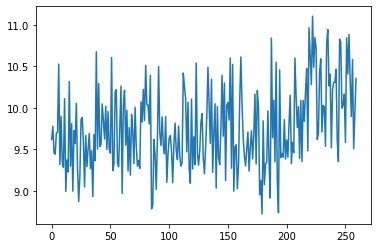

Enter threshold: 10.4


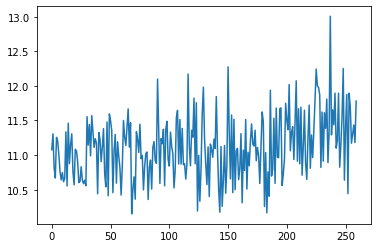

Enter threshold: 11.6


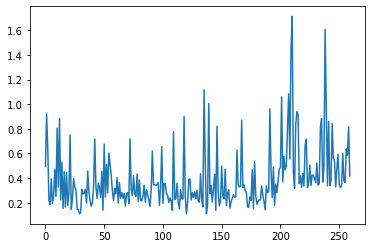

Enter threshold: 0.8


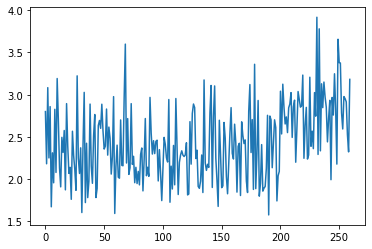

Enter threshold: 3


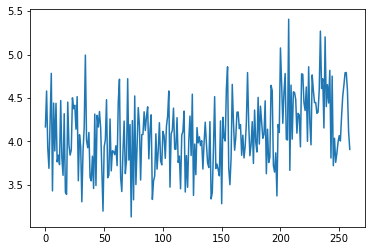

Enter threshold: 4.5


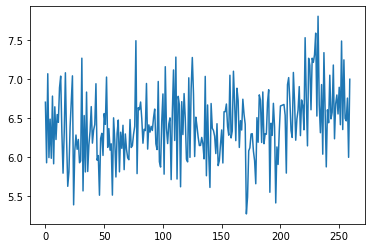

Enter threshold: 7


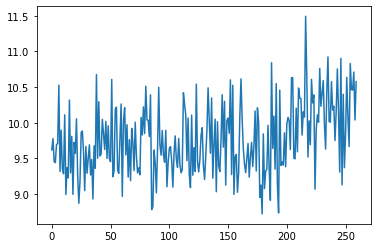

Enter threshold: 10.4


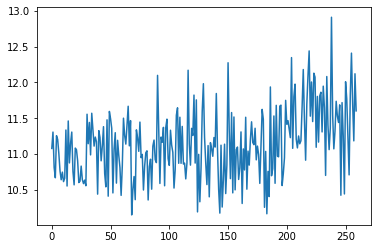

Enter threshold: 11.6


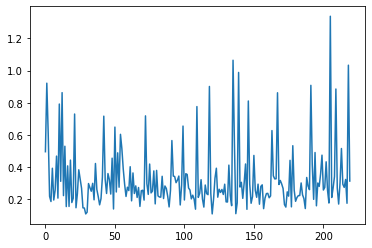

Enter threshold: 0.6


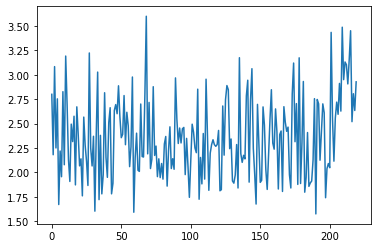

Enter threshold: 2.8


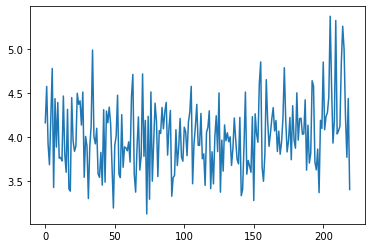

Enter threshold: 4.5


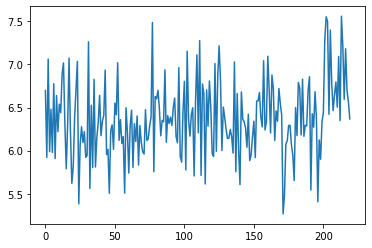

Enter threshold: 6.7


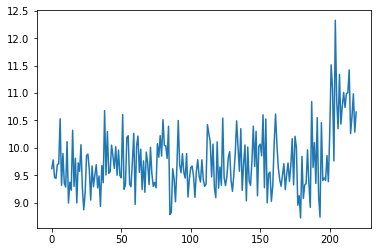

Enter threshold: 10.2


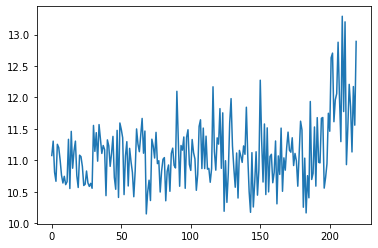

Enter threshold: 11.5


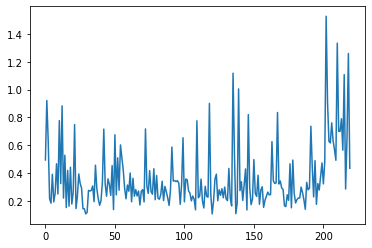

Enter threshold: 0.7


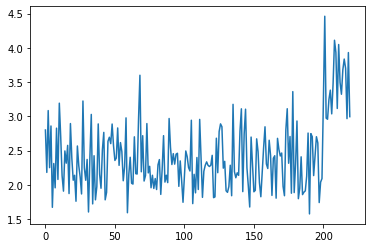

Enter threshold: 3


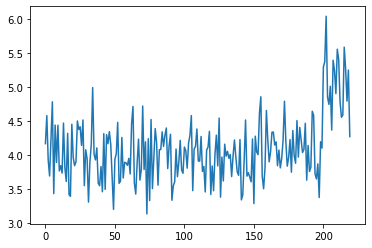

Enter threshold: 4.5


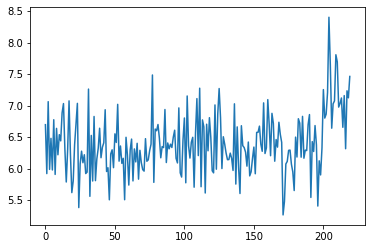

Enter threshold: 7


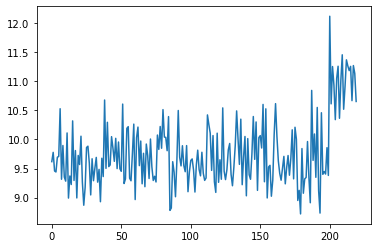

Enter threshold: 10.4


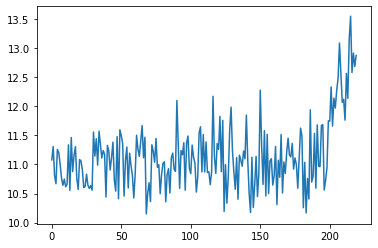

Enter threshold: 11.5


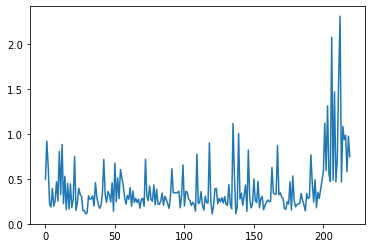

Enter threshold: 1


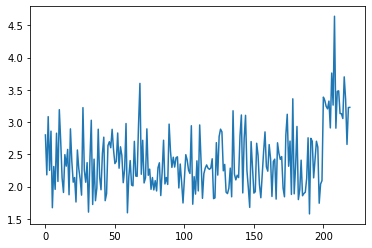

Enter threshold: 3


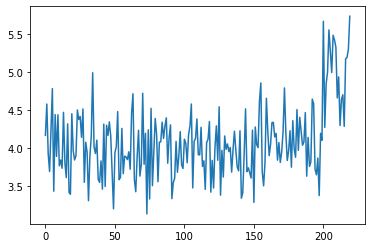

Enter threshold: 4.5


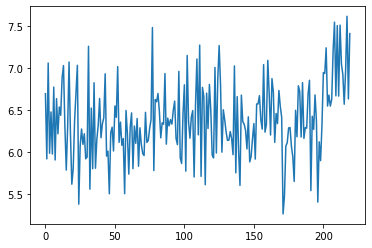

Enter threshold: 7


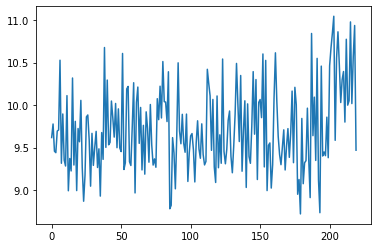

Enter threshold: 10.25


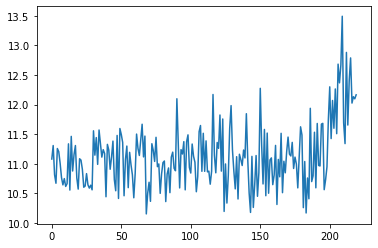

Enter threshold: 11.6


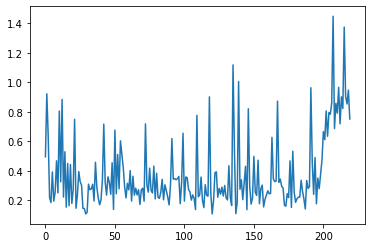

Enter threshold: 0.6


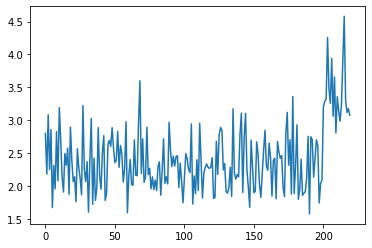

Enter threshold: 2.8


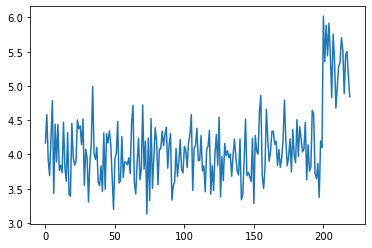

Enter threshold: 4.5


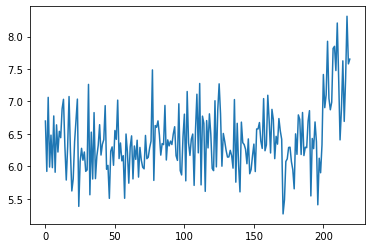

Enter threshold: 7


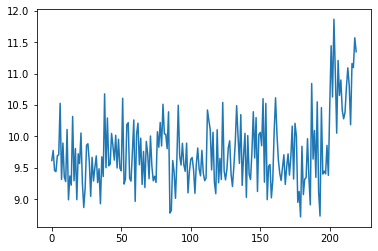

Enter threshold: 10.5


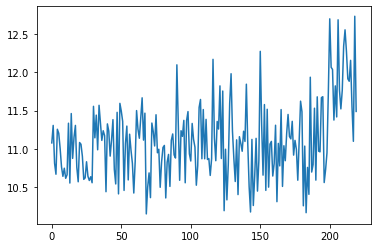

Enter threshold: 11.5


In [11]:
#KNN


def replace_lbls(lbl, indx):
  for idx in indx:
    lbl[idx] = 1
  return lbl

red = [30,50,70,90]
p70 = [1,2,3,4]
redPath = '/content/OutlierDetect/Data/reduced_synthetic_data/'

#path_reduced = "/content/"+str(self.reduction)+'p'
#os.mkdir(path_reduced)
#path = "/content/"+str(self.reduction)+'p'+"/outlierScore_perData/"
#os.mkdir(path)

for folders in red:
  subfold = redPath+str(folders)+'p/'
  p70 = [1,2,3,4]
  for subsub in p70:
    subfold = redPath+str(folders)+'p/'
    subfold = subfold+str(subsub)+'/'
    path = subfold+'/KNNOut/'
    os.mkdir(path)
    dim = [2, 10, 20, 40, 80, 100]
    for files in dim:
      filename = subfold+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'.xlsx'
      df = pd.read_excel(filename)
      df.drop(['Unnamed: 0'],axis=1,inplace=True)
      X = np.array(df.iloc[:,:-1])

      # instantiate model
      nbrs = NearestNeighbors(n_neighbors = 10)
      # fit model
      nbrs.fit(X)
      # distances and indexes of k-neighbors from model outputs
      distances, indexes = nbrs.kneighbors(X)
      lbl = np.zeros((len(X),), dtype=int)
      #print(distances)
      #print(list(indexes))
  
      # plot mean of k-distances of each observation
      plt.plot(distances.mean(axis =1))
      plt.show()
      # visually determine cutoff values > 0.15
      thres = float(input('Enter threshold: '))
      outlier_index = np.where(distances.mean(axis = 1) > thres)
      #print(outlier_index)
      lbl = replace_lbls(lbl,outlier_index)

      #clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
      #y_pred = clf.fit_predict(X)
      #X_scores = clf.negative_outlier_factor_
      #plt.title("Local Outlier Factor (LOF)")
      #plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
      # plot circles with radius proportional to the outlier scores
      #radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
      #plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
      #plt.axis("tight")
      #plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
      #plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
      #plt.xlabel("prediction errors: %d" % (n_errors))
      #legend = plt.legend(loc="upper left")
      #legend.legendHandles[0]._sizes = [10]
      #legend.legendHandles[1]._sizes = [20]
      #plt.show()
      df_lofnorm=pd.concat([df,pd.DataFrame(lbl,columns=['KNN_ouliers'])],axis=1)
      df_lofnorm.to_excel(path+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'_KNNOut.xlsx')
      #break
    #break
  #break

In [8]:
df_lofnorm

,A1,A2,Y,KNN_ouliers
0,2.764052,1.400157,0,1
1,1.978738,3.240893,0,1
2,2.867558,0.022722,0,1
3,1.950088,0.848643,0,0
4,0.896781,1.410599,0,0
...,...,...,...,...
335,-1.259781,0.058599,1,0
336,-0.657871,0.049916,1,0
337,-0.797401,1.412470,1,0
338,0.174586,-0.977099,1,0


In [14]:
%rm -rf /content/OutlierDetect

In [14]:
!zip -r /content/reduced_synthetic_data.zip /content/reduced_synthetic_data

  adding: content/reduced_synthetic_data/ (stored 0%)
  adding: content/reduced_synthetic_data/30p.zip (stored 0%)
  adding: content/reduced_synthetic_data/50p/ (stored 0%)
  adding: content/reduced_synthetic_data/50p/2/ (stored 0%)
  adding: content/reduced_synthetic_data/50p/2/50p_m2_dim20.xlsx (deflated 1%)
  adding: content/reduced_synthetic_data/50p/2/50p_m2_dim100.xlsx (deflated 0%)
  adding: content/reduced_synthetic_data/50p/2/50p_m2_dim80.xlsx (deflated 0%)
  adding: content/reduced_synthetic_data/50p/2/50p_m2_dim10.xlsx (deflated 1%)
  adding: content/reduced_synthetic_data/50p/2/KNNOut/ (stored 0%)
  adding: content/reduced_synthetic_data/50p/2/KNNOut/50p_m2_dim100_KNNOut.xlsx (deflated 0%)
  adding: content/reduced_synthetic_data/50p/2/KNNOut/50p_m2_dim2_KNNOut.xlsx (deflated 5%)
  adding: content/reduced_synthetic_data/50p/2/KNNOut/50p_m2_dim80_KNNOut.xlsx (deflated 0%)
  adding: content/reduced_synthetic_data/50p/2/KNNOut/50p_m2_dim20_KNNOut.xlsx (deflated 1%)
  adding: c

In [12]:
!zip -r /content/reduced_synthetic_data.zip . i /content/OutlierDetect/Data/reduced_synthetic_data

	zip warning: name not matched: i
  adding: .config/ (stored 0%)
  adding: .config/active_config (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2021.12.03/ (stored 0%)
  adding: .config/logs/2021.12.03/14.33.16.964195.log (deflated 54%)
  adding: .config/logs/2021.12.03/14.32.30.027140.log (deflated 91%)
  adding: .config/logs/2021.12.03/14.33.36.903459.log (deflated 54%)
  adding: .config/logs/2021.12.03/14.33.09.955489.log (deflated 86%)
  adding: .config/logs/2021.12.03/14.32.50.522723.log (deflated 53%)
  adding: .config/logs/2021.12.03/14.33.37.701606.log (deflated 53%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/.last_update_check.json (deflated 24%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: OutlierDetect/ (stored 0%)
 

In [10]:
removeFolder('/content/70p')